**1. IMPORT THE APPROPRIATE LIBRARIES AND FUNCTIONS**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**2. IMPORT DATA**

In [2]:
data = pd.read_csv("data_ML/qsar_oral_toxicity.csv",sep=";")

In [3]:
data.head()
##to view the first 5 rows of the data 

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.962,0.963,0.964,0.965,0.966,0.967,0.968,0.969,0.970,negative
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,negative
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,negative
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,negative


**3. DATA EXPLORATION**

In [4]:
##there are 8991 observations and 1025 variables
##as stated, the 1024 variables are the binary molecular fingerprints and the 1025th variable is the response var 'negative'

In [4]:
data.info()
##there are 8991 observations and 1025 variables
##as stated, the 1024 variables are the binary molecular fingerprints and the 1025th variable is the response var 'negative'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8991 entries, 0 to 8990
Columns: 1025 entries, 0 to negative
dtypes: int64(1024), object(1)
memory usage: 70.3+ MB


In [62]:
#data.info

In [63]:
##there are 8250 negative counts and 741 positive counts
##forthly, counts for each class ( negative and positive)

In [5]:
data.negative.value_counts()

negative    8250
positive     741
Name: negative, dtype: int64

<AxesSubplot:title={'center':'Distribution of Oral Toxicity'}, ylabel='negative'>

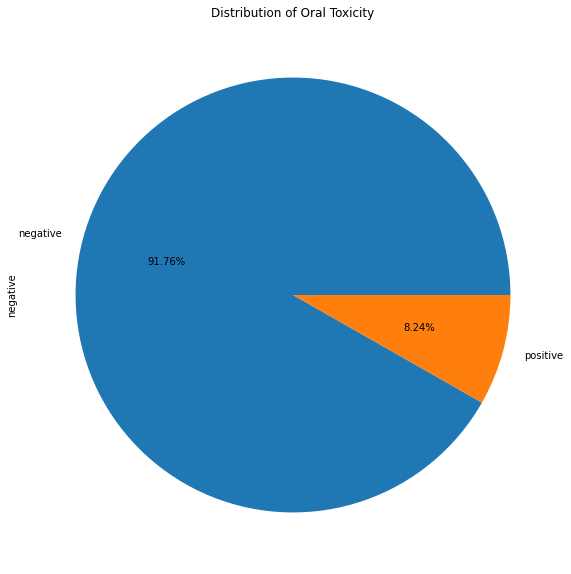

In [6]:
## Distribution of Oral Toxicity
plt.figure(figsize=(10,10))
plt.title("Distribution of Oral Toxicity")
data["negative"].value_counts().plot(kind="pie",autopct='%1.2f%%')
##fifthly, visualizaing the counts for response variable

In [66]:
##second checking the missing values
## cont of 2nd checking the missing values
##there are zero missing values

In [7]:
data.isnull().sum()

0           0
0.1         0
0.2         0
0.3         0
0.4         0
           ..
0.967       0
0.968       0
0.969       0
0.970       0
negative    0
Length: 1025, dtype: int64

In [8]:
(data.isnull().sum()==0).value_counts()

True    1025
dtype: int64

In [9]:
##thirdly find for duplicates by assigning the data as pandas dataframe
df = pd.DataFrame(data)
df
#df.duplicated()
(df.duplicated().sum()==True)
##so no duplicated values!

False

In [10]:
df = pd.DataFrame(data)
df
(df.duplicated().sum()==True)

False

**4. DATA PRE-PREPROCESSING**

There is no data pre-processing such as data cleaning in the absence of missign values, duplicates and etc.

**5. EXTRACT X AND Y / IV AND DEPENDENT VARIABLES**

In [11]:
x = data.drop("negative",axis=1)

In [12]:
x
##extracted the independent variables (1024 columns/variables) of binary molecular fingerprints

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.961,0.962,0.963,0.964,0.965,0.966,0.967,0.968,0.969,0.970
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8986,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
8987,0,1,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
8988,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
8989,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# extracting y and assigning dummy variables as 0=negative and 1=positive 

In [14]:
y = data['negative'].replace(['negative', 'positive'],
                        [0, 1], inplace=True)
y = data['negative']

In [15]:
y

0       0
1       0
2       0
3       0
4       0
       ..
8986    0
8987    0
8988    0
8989    0
8990    0
Name: negative, Length: 8991, dtype: int64

In [16]:
y.value_counts()
##recheck
##8250 negative and 741 positive

0    8250
1     741
Name: negative, dtype: int64

In [17]:
8250+741==len(y)

True

In [78]:
##visualization is not convenient for this kind of huge data so i didnt include it but if you want
##we can include hist to each or amother plot 

**6. SPLITTING THE TEST AND TRAIN DATASET**

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report,accuracy_score
from sklearn.metrics import roc_curve , auc
from sklearn.linear_model import LogisticRegression

In [19]:
## Splitting data into training and test sets (80-20 rule validation)

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

In [21]:
x_train

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.961,0.962,0.963,0.964,0.965,0.966,0.967,0.968,0.969,0.970
7702,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
536,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5758,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1114,1,0,0,0,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
6989,0,0,0,0,0,1,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4373,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7891,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4859,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3264,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [22]:
x_test

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.961,0.962,0.963,0.964,0.965,0.966,0.967,0.968,0.969,0.970
3287,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4255,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
2730,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4214,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8090,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3728,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4291,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
700,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7052,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0


In [84]:
#rechecked

In [23]:
len(x_train)+len(x_test)==len(x)

True

In [24]:
print(round(100*len(x_train)/len(x)),"%")
print(round(100*len(x_test)/len(x)),"%")

80 %
20 %


In [25]:
y_train

7702    1
536     0
5758    0
1114    0
6989    0
       ..
4373    0
7891    0
4859    0
3264    0
2732    0
Name: negative, Length: 7192, dtype: int64

In [26]:
y_test

3287    0
4255    0
2730    0
4214    0
8090    0
       ..
3728    0
4291    0
700     0
7052    0
176     0
Name: negative, Length: 1799, dtype: int64

In [27]:
len(y_train)+len(y_test)==len(y)

True

In [28]:
print(round(100*len(y_train)/len(y)),"%")
print(round(100*len(y_test)/len(y)),"%")

80 %
20 %


**7. Model Training**

**Using the training dataset**

In [29]:
model=LogisticRegression()
model.fit(x_train,y_train)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
y_pred_train=model.predict(x_train)
print("accuracy score : ",accuracy_score(y_train,y_pred_train))

accuracy score :  0.9646829810901001


In [93]:
## training dataset accuracy score
##good accuracy but we can only evaluate the the prediction accuracy with test data

**Using the testing dataset**

In [94]:
## Predicting data

In [31]:
import seaborn as sns

In [32]:
y_pred=model.predict(x_test)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1661
           1       0.52      0.41      0.46       138

    accuracy                           0.93      1799
   macro avg       0.74      0.69      0.71      1799
weighted avg       0.92      0.93      0.92      1799

Confusion matrix is 
 [[1610   51]
 [  82   56]]


Text(42.0, 0.5, 'predicted label')

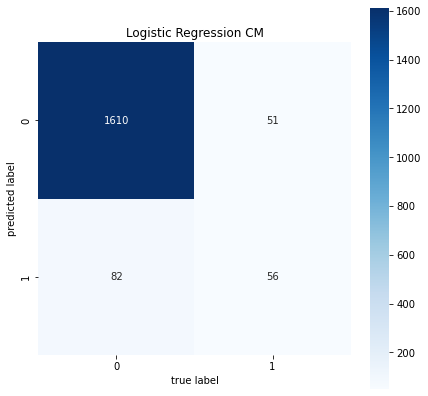

In [33]:
## classification report
print(classification_report(y_test,y_pred))

## confusion matrix
conf_mat=confusion_matrix(y_test,y_pred)
print("Confusion matrix is \n",conf_mat)

## plotting confusion matrix
plt.figure(figsize=(7,7))
plt.title("Logistic Regression CM")
sns.heatmap(conf_mat, square=True,cmap="Blues",annot=True,fmt='d')
plt.xlabel('true label')
plt.ylabel('predicted label')


**8. Accuracy score**

In [98]:
## accuracy score and percentage

In [34]:
print("accuracy score : ",accuracy_score(y_test,y_pred))
print("accuracy:", round(100*accuracy_score(y_test,y_pred)),"%")

accuracy score :  0.9260700389105059
accuracy: 93 %


**9. ROC curve**

In [100]:
## Prediction using predict_proba
#after the roc_auc=auc(fpr,tpr)
#Now Draw ROC using fpr , tpr

In [35]:
y_pred_proba = model.predict_proba(x_test)[:,1]

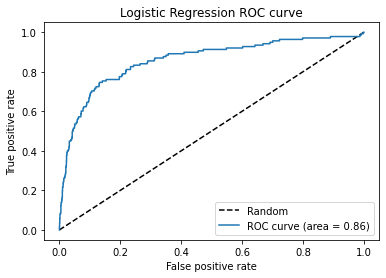

In [36]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc=auc(fpr,tpr)

plt.plot([0, 1], [0, 1], 'k--',label='Random')
plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' %roc_auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression ROC curve')
plt.legend(loc='best')

**10. scikit learn to geenrate the coef, proba, cross-validation**

In [37]:
pd.DataFrame(zip(x.columns, np.transpose(model.coef_)))
##coefficeints

,0,1
0,0,[0.2490398877504804]
1,0.1,[0.44305636828144845]
2,0.2,[0.5560524341318814]
3,0.3,[0.21848417333074568]
4,0.4,[-0.5579499377348893]
...,...,...
1019,0.966,[-0.15785095034920585]
1020,0.967,[0.18933083874674592]
1021,0.968,[-0.5282877504066344]
1022,0.969,[-0.989471108110225]


In [104]:
##class probability for of test data

In [115]:
#probability = model.predict_proba(x_test)
#print (probability)
##just ignore this

[[9.95223857e-01 4.77614287e-03]
 [6.11732969e-01 3.88267031e-01]
 [9.81719155e-01 1.82808450e-02]
 ...
 [7.37248899e-01 2.62751101e-01]
 [9.98831295e-01 1.16870463e-03]
 [9.99596621e-01 4.03379369e-04]]


In [ ]:
##model cross-validation
##the accuracy is still 92% which means the model is working fine

In [38]:
from sklearn.model_selection import cross_val_score
cross_val = cross_val_score(LogisticRegression(), x, y, scoring='accuracy', cv=10)
print(cross_val)
print(cross_val.mean())

C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

[0.92555556 0.91657397 0.92213571 0.91212458 0.91212458 0.93548387
 0.91546162 0.93659622 0.91879867 0.92769744]
0.9222552218514398


C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**for the above**

Conclusion
It can be observed that the Logistic Regression model in Python predicts the classes with an accuracy of approximately 92% and generates good returns. Now it’s your turn to play with the code by changing parameters and create a trading strategy based on it.

**11. Generating the result**

In [106]:
##result
##to use the 'add_constant' attribute/formula?
##which is unavailable in smf

In [39]:
import statsmodels.api as sm

In [40]:
X = sm.add_constant(x)

C:\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [41]:
model = sm.Logit(endog=y, exog=X).fit()

Optimization terminated successfully.
         Current function value: 0.080655
         Iterations 13


In [42]:
print(model.summary())

                           Logit Regression Results                           
Dep. Variable:               negative   No. Observations:                 8991
Model:                          Logit   Df Residuals:                     7966
Method:                           MLE   Df Model:                         1024
Date:                Mon, 07 Nov 2022   Pseudo R-squ.:                  0.7166
Time:                        15:49:13   Log-Likelihood:                -725.17
converged:                       True   LL-Null:                       -2559.1
Covariance Type:            nonrobust   LLR p-value:                2.695e-293
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.0002      0.683     -5.854      0.000      -5.340      -2.661
0             -0.6892      0.919     -0.750      0.453      -2.491       1.112
0.1            2.2277      0.958      2.326      0.0

In [ ]:
# get odds ratio

In [43]:
np.exp(model.params)

const     0.018312
0         0.501976
0.1       9.278723
0.2       2.599339
0.3       3.833015
           ...    
0.966     0.242669
0.967    31.674551
0.968     0.621524
0.969     0.006854
0.970     0.781564
Length: 1025, dtype: float64

**Quest 2: test error rate**

In [44]:
#test error rate
#the number of all incorrect predictions divided by the total number of the dataset.
TER = (51+82)/len(y_test)
TER
##so we got a very low test error rate!

0.07392996108949416

In [45]:
TER = (51+82)/len(y_test)
TER

0.07392996108949416

In [46]:
print("Test Error Rate:", round(100*(51+82)/len(y_test)),"%")

Test Error Rate: 7 %


In [49]:
model.pred_table()

array([[8169.,   81.],
       [ 170.,  571.]])

In [53]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               negative   No. Observations:                 8991
Model:                          Logit   Df Residuals:                     7966
Method:                           MLE   Df Model:                         1024
Date:                Mon, 07 Nov 2022   Pseudo R-squ.:                  0.7166
Time:                        15:51:08   Log-Likelihood:                -725.17
converged:                       True   LL-Null:                       -2559.1
Covariance Type:            nonrobust   LLR p-value:                2.695e-293
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.0002      0.683     -5.854      0.000      -5.340      -2.661
0             -0.6892      0.919     -0.750      0.453      -2.491       1.112
0.1            2.2277      0.958      2.326      0.020       0.350       4.105
0.2            0.9553      0.997      0.958      0.338      -1.000       2.910
0.3            1.3437      0.916      1.466      0.143      -0.452       3.140
0.4            0.7761      1.705      0.455      0.649      -2.566       4.118
0.5           -3.2984      1.131     -2.917      0.004      -5.515      -1.082
0.6           -0.2919      0.817     -0.357      0.721      -1.893       1.309
0.7            0.5000      1.030      0.485      0.627      -1.519       2.519
0.8            4.8532      1.295      3.748      0.000       2.315       7.391
0.9           -2.1093      1.631     -1.294      0.196      -5.305       1.087
1             -1.3977      0.777     -1.798      0.072      -2.922       0.126
0.10          -0.3671      1.235     -0.297      0.766      -2.788       2.053
0.11          -2.1229      0.990     -2.144      0.032      -4.064      -0.182
0.12           0.4002      0.772      0.519      0.604      -1.112       1.913
0.13           0.2870      0.907      0.317      0.752      -1.490       2.064
0.14           1.3657      0.942      1.450      0.147      -0.480       3.212
1.1            1.2952      1.154      1.122      0.262      -0.967       3.557
0.15           2.3130      1.262      1.833      0.067      -0.160       4.786
0.16           0.6268      0.900      0.696      0.486      -1.138       2.391
0.17          -3.0783      1.283     -2.400      0.016      -5.593      -0.564
0.18           0.8307      1.168      0.711      0.477      -1.458       3.120
0.19           0.5088      0.946      0.538      0.591      -1.345       2.363
0.20           2.9929      1.128      2.652      0.008       0.781       5.205
0.21           0.7849      1.285      0.611      0.541      -1.734       3.303
0.22          -3.1394      1.190     -2.638      0.008      -5.472      -0.807
0.23           2.3024      0.942      2.444      0.015       0.456       4.149
0.24          -2.7286      1.158     -2.356      0.018      -4.998      -0.459
0.25           1.4578      0.962      1.515      0.130      -0.428       3.344
0.26          -2.6278      1.385     -1.897      0.058      -5.343       0.087
0.27          -0.9511      1.005     -0.947      0.344      -2.920       1.018
0.28          -2.1450      1.221     -1.757      0.079      -4.537       0.247
0.29          -3.6374      1.137     -3.200      0.001      -5.865      -1.410
0.30           1.8372      0.875      2.100      0.036       0.122       3.552
0.31           0.7349      1.401      0.524      0.600      -2.012       3.482
0.32           2.5528      0.939      2.717      0.007       0.712       4.394
0.33          -2.4456      1.492     -1.639      0.101      -5.370       0.479
0.34           0.0092      0.957      0.010      0.992      -1.866       1.884
0.